In [1]:
library(data.table)
library(dplyr)
library(stringr)
library(ggplot2)


Attache Paket: ‘dplyr’


Die folgenden Objekte sind maskiert von ‘package:data.table’:

    between, first, last


Die folgenden Objekte sind maskiert von ‘package:stats’:

    filter, lag


Die folgenden Objekte sind maskiert von ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
prot_int <- read.table("prot_int.csv")
dim(prot_int)
head(prot_int)

[1] 10825    60

,X786O_NCI60,A498_NCI60,A549_NCI60,ACHN_NCI60,BT549_NCI60,CAKI1_NCI60,CCRFCEM_NCI60,COLO205_NCI60,DU145_NCI60,EKVX_NCI60,⋯,SNB19_NCI60,SNB75_NCI60,SR_NCI60,SW620_NCI60,T47D_NCI60,TK10_NCI60,U031_NCI60,U251_NCI60,UACC257_NCI60,UACC62_NCI60
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
P0DN26;A0A075B759;Q9Y536;F5H284;A0A0B4J2A2;P0DN37,3812400,32150000,6094400,4313900,0,47658000,5785500,64889000,33141000,30032000,⋯,18067000,60596000,7556500,8213600,48755000,161350000,0,54603000,48719000,14605000
A0A0B4J2F0,0,0,0,0,0,0,0,0,0,6635200,⋯,0,0,0,0,0,0,0,0,0,0
A0A0C4DH73,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A0A5B9;P01850,0,0,0,0,0,0,234380000,0,7342300,0,⋯,0,0,5834700,0,0,0,0,10133000,0,35631000
A0AV96;A0AV96-2,73467000,567040000,490700000,1056000000,23231000,242810000,21620000,3138100000,108070000,1439200000,⋯,81147000,21566000,11199000,513940000,857760000,1651300000,470600000,40020000,106450000,0
A0AVF1;A0AVF1-2;A0AVF1-3,6052600,54431000,24653000,52919000,15826000,0,17568000,18730000,9006900,12765000,⋯,75090000,46642000,0,70986000,20219000,62485000,13611000,29807000,53550000,114360000


prot_int$noMeasured <- apply(prot_int, 1, function(x) sum(x ==0))
aberrant_expressed <- rownames(prot_int[prot_int$noMeasured==1,])

In [3]:
training <- fread("files/outrider_res.txt")
training <- training[,-1]
training$sampleID <- gsub('_NCI60','',training$sampleID)
features <- unique(training$featureID)
length(features)

Warning message in fread("files/outrider_res.txt"):
“Detected 19 column names but the data has 20 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


[1] 6975

In [4]:
prot <- fread("proteinGroups.txt")
colnames(prot)[1] <- 'featureID'
#prot <- prot[prot$featureID %in% aberrant_expressed, c(1,7)]

prot$mainFID <- lapply(prot$featureID, function(x){
    strsplit(x,";")[[1]][1]
})
prot$mainFID <- as.character(prot$mainFID)

prot$gene_name <- lapply(prot$`Gene names`, function(x){
    strsplit(x,";")[[1]][1]
})
prot$gene_name <- as.character(prot$gene_name)
nrow(prot)
head(prot)

[1] 10825

featureID                                        
1 P0DN26;A0A075B759;Q9Y536;F5H284;A0A0B4J2A2;P0DN37
2 A0A0B4J2F0                                       
3 A0A0C4DH73                                       
4 A0A5B9;P01850                                    
5 A0AV96;A0AV96-2                                  
6 A0AVF1;A0AVF1-2;A0AVF1-3                         
  Majority protein IDs                              Peptide counts (all)
1 P0DN26;A0A075B759;Q9Y536;F5H284;A0A0B4J2A2;P0DN37 4;4;4;4;3;2         
2 A0A0B4J2F0                                        1                   
3 A0A0C4DH73                                        1                   
4 A0A5B9;P01850                                     5;4                 
5 A0AV96;A0AV96-2                                   26;25               
6 A0AVF1;A0AVF1-2;A0AVF1-3                          8;7;7               
  Peptide counts (razor+unique) Peptide counts (unique)
1 2;2;2;2;1;1                   2;2;2;2;1;1            
2 1                             1                      
3 1                             1                      
4 5;4                           5;4                    
5 26;25                         24;23                  
6 8;7;7                         8;7;7                  
  Protein names                                                                                                                      
1 Peptidyl-prolyl cis-trans isomerase;Peptidyl-prolyl cis-trans isomerase A-like 4A/B/C;Peptidyl-prolyl cis-trans isomerase A-like 4D
2                                                                                                                                    
3                                                                                                                                    
4 T-cell receptor beta-2 chain C region;T-cell receptor beta-1 chain C region                                                        
5 RNA-binding protein 47                                                                                                             
6 Intraflagellar transport protein 56                                                                                                
  Gene names                     
1 PPIAL4E;PPIAL4A;PPIAL4D;PPIAL4C
2 PIGBOS1                        
3 IGKV1-12                       
4 TRBC2;TRBC1                    
5 RBM47                          
6 TTC26                          
  Fasta headers                                                                                                                                                                                                                                                   
1 sp|P0DN26|PAL4F_HUMAN Peptidyl-prolyl cis-trans isomerase A-like 4F OS=Homo sapiens GN=PPIAL4F PE=3 SV=1;sp|A0A075B759|PAL4E_HUMAN Peptidyl-prolyl cis-trans isomerase A-like 4E OS=Homo sapiens GN=PPIAL4E PE=3 SV=1;sp|Q9Y536|PAL4A_HUMAN Peptidyl-prolyl cis-
2 sp|A0A0B4J2F0|PIOS1_HUMAN Protein PIGBOS1 OS=Homo sapiens GN=PIGBOS1 PE=3 SV=1                                                                                                                                                                                  
3 sp|A0A0C4DH73|KV112_HUMAN Immunoglobulin kappa variable 1-12 OS=Homo sapiens GN=IGKV1-12 PE=3 SV=1                                                                                                                                                              
4 sp|A0A5B9|TRBC2_HUMAN T-cell receptor beta-2 chain C region OS=Homo sapiens GN=TRBC2 PE=1 SV=1;sp|P01850|TRBC1_HUMAN T-cell receptor beta-1 chain C region OS=Homo sapiens GN=TRBC1 PE=1 SV=3                                                                   
5 sp|A0AV96|RBM47_HUMAN RNA-binding protein 47 OS=Homo sapiens GN=RBM47 PE=1 SV=2;sp|A0AV96-2|RBM47_HUMAN Isoform 2 of RNA-binding protein 47 OS=Homo sapiens GN=RBM47                                                                                            
6 sp|

In [5]:
variant <- fread("files/insample.csv")
variant$sampleID <- variant$sampleID %>%
  strsplit( ":")  %>%
  sapply( tail, 1 ) %>%
  str_replace_all("-","")%>%
  str_replace_all(" ","")%>%
  str_replace("(TB)","")%>%
  str_replace("UO31","U031")%>%
  str_replace_all('\\(|\\)', "")%>%
  str_replace_all("A549/ATCC","A549")%>%
  str_replace_all("7860","X786O")%>%
  str_replace_all("MDAN","MDAMB468")%>%
  str_replace_all("NCI/ADRRES","NCIADRES")

head(variant)
dim(variant)

Identifier,sampleID,dbSNPid,gene_name,snpType
<chr>,<chr>,<chr>,<chr>,<chr>
chr10:100010849_G_A,SKMEL2,rs770272930,LOXL4,Missense
chr10:100013418_T_G,SKMEL2,rs148260647,LOXL4,Missense
chr10:100020867_C_A,HCT15,-,LOXL4,Missense
chr10:100021911_C_T,MCF7,rs139735732,LOXL4,Missense
chr10:100167409_A_C,HCC2998,-,PYROXD2,Missense
chr10:100183570_G_C,SKMEL5,rs2296434,HPS1,Missense


[1] 113641      5

In [6]:
length(unique(variant$sampleID))
length(unique(variant$gene_name))

[1] 60

[1] 12636

In [7]:
length(unique(variant$Identifier))

[1] 43341

In [8]:
table(variant[!duplicated(variant$Identifier),]$snpType)


Frameshift   Missense   Nonsense   Splicing 
       682      39951       1975        733 

In [9]:
variant_info <- data.frame(variant_type = c("Frameshift",  "Missense", "Nonsense", "Splicing"),
         Before = c(1005, 53579, 2074, 800),
         After = c(682, 39951, 1975, 733),
         Missing = c(35, 1784, 72, 32))
variant_info$Missing/variant_info$After

[1] 0.05131965 0.04465470 0.03645570 0.04365621

In [10]:
variant_info <- melt(variant_info)
colnames(variant_info)[2:3] <- c("Filtering", "Count")

Warning message in melt(variant_info):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(variant_info). In the next version, this warning will become an error.”
Using variant_type as id variables



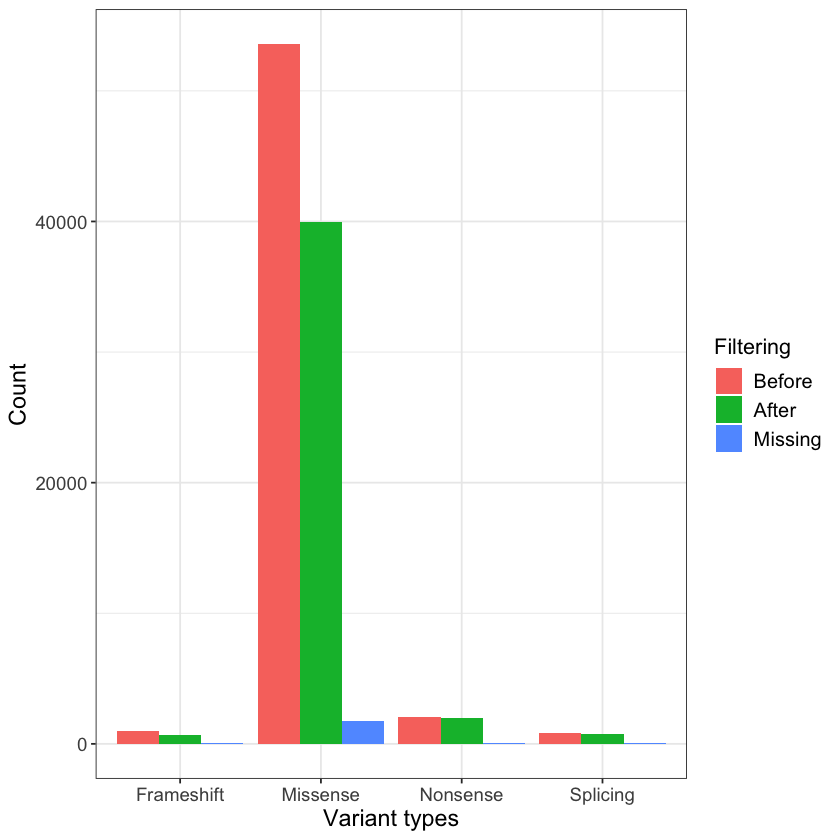

In [11]:
ggplot(variant_info, aes(x = variant_type, y = Count, fill=Filtering)) + 
geom_bar(stat="identity", position=position_dodge()) + theme_bw() + 
xlab("Variant types") + ylab("Count") +
theme(text=element_text(size=14), legend.title = element_text(size=13), legend.text = element_text(size=12))

In [12]:
result <- merge(prot, variant)
result <- result[,c("sampleID", "featureID")]
result <- result[!duplicated(result),]
head(result)

sampleID,featureID
<chr>,<chr>
RPMI8226,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4
MDAMB468,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4
MDAMB435,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4
MOLT4,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4
DU145,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4
LOXIMVI,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4


In [13]:
result <- merge(prot, variant)
result <- result[,c("sampleID", "featureID")]
result <- result[!duplicated(result),]
nrow(result)
head(result)

[1] 49614

sampleID,featureID
<chr>,<chr>
RPMI8226,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4
MDAMB468,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4
MDAMB435,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4
MOLT4,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4
DU145,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4
LOXIMVI,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4


In [14]:
prot$gene_name_2 <- lapply(prot$`Gene names`, function(x){
    strsplit(x,";")[[1]][2]
})
prot$gene_name_2 <- as.character(prot$gene_name_2)
nrow(prot)
head(prot)

[1] 10825

featureID                                        
1 P0DN26;A0A075B759;Q9Y536;F5H284;A0A0B4J2A2;P0DN37
2 A0A0B4J2F0                                       
3 A0A0C4DH73                                       
4 A0A5B9;P01850                                    
5 A0AV96;A0AV96-2                                  
6 A0AVF1;A0AVF1-2;A0AVF1-3                         
  Majority protein IDs                              Peptide counts (all)
1 P0DN26;A0A075B759;Q9Y536;F5H284;A0A0B4J2A2;P0DN37 4;4;4;4;3;2         
2 A0A0B4J2F0                                        1                   
3 A0A0C4DH73                                        1                   
4 A0A5B9;P01850                                     5;4                 
5 A0AV96;A0AV96-2                                   26;25               
6 A0AVF1;A0AVF1-2;A0AVF1-3                          8;7;7               
  Peptide counts (razor+unique) Peptide counts (unique)
1 2;2;2;2;1;1                   2;2;2;2;1;1            
2 1                             1                      
3 1                             1                      
4 5;4                           5;4                    
5 26;25                         24;23                  
6 8;7;7                         8;7;7                  
  Protein names                                                                                                                      
1 Peptidyl-prolyl cis-trans isomerase;Peptidyl-prolyl cis-trans isomerase A-like 4A/B/C;Peptidyl-prolyl cis-trans isomerase A-like 4D
2                                                                                                                                    
3                                                                                                                                    
4 T-cell receptor beta-2 chain C region;T-cell receptor beta-1 chain C region                                                        
5 RNA-binding protein 47                                                                                                             
6 Intraflagellar transport protein 56                                                                                                
  Gene names                     
1 PPIAL4E;PPIAL4A;PPIAL4D;PPIAL4C
2 PIGBOS1                        
3 IGKV1-12                       
4 TRBC2;TRBC1                    
5 RBM47                          
6 TTC26                          
  Fasta headers                                                                                                                                                                                                                                                   
1 sp|P0DN26|PAL4F_HUMAN Peptidyl-prolyl cis-trans isomerase A-like 4F OS=Homo sapiens GN=PPIAL4F PE=3 SV=1;sp|A0A075B759|PAL4E_HUMAN Peptidyl-prolyl cis-trans isomerase A-like 4E OS=Homo sapiens GN=PPIAL4E PE=3 SV=1;sp|Q9Y536|PAL4A_HUMAN Peptidyl-prolyl cis-
2 sp|A0A0B4J2F0|PIOS1_HUMAN Protein PIGBOS1 OS=Homo sapiens GN=PIGBOS1 PE=3 SV=1                                                                                                                                                                                  
3 sp|A0A0C4DH73|KV112_HUMAN Immunoglobulin kappa variable 1-12 OS=Homo sapiens GN=IGKV1-12 PE=3 SV=1                                                                                                                                                              
4 sp|A0A5B9|TRBC2_HUMAN T-cell receptor beta-2 chain C region OS=Homo sapiens GN=TRBC2 PE=1 SV=1;sp|P01850|TRBC1_HUMAN T-cell receptor beta-1 chain C region OS=Homo sapiens GN=TRBC1 PE=1 SV=3                                                                   
5 sp|A0AV96|RBM47_HUMAN RNA-binding protein 47 OS=Homo sapiens GN=RBM47 PE=1 SV=2;sp|A0AV96-2|RBM47_HUMAN Isoform 2 of RNA-binding protein 47 OS=Homo sapiens GN=RBM47                                                                                            
6 sp|

In [15]:
prot_2 <-prot[!is.na(prot$gene_name_2),]
nrow(prot_2)
result_2 <- merge(prot_2, variant)
result_2 <- result_2[,c("sampleID", "featureID")]
result_2 <- result_2[!duplicated(result_2),]
nrow(result_2)
head(result_2)

[1] 150

[1] 173

sampleID,featureID
<chr>,<chr>
HL60,Q96HJ9-2;Q9Y383-3;Q9Y383-2;Q96HJ9;REV__P07951-2
K562,Q96HJ9-2;Q9Y383-3;Q9Y383-2;Q96HJ9;REV__P07951-2
EKVX,Q96HJ9-2;Q9Y383-3;Q9Y383-2;Q96HJ9;REV__P07951-2
SF268,Q96HJ9-2;Q9Y383-3;Q9Y383-2;Q96HJ9;REV__P07951-2
SKMEL28,Q96HJ9-2;Q9Y383-3;Q9Y383-2;Q96HJ9;REV__P07951-2
COLO205,Q96HJ9-2;Q9Y383-3;Q9Y383-2;Q96HJ9;REV__P07951-2


In [16]:
prot$gene_name_3 <- lapply(prot$`Gene names`, function(x){
    strsplit(x,";")[[1]][3]
})
prot$gene_name_3 <- as.character(prot$gene_name_3)
prot_3 <-prot[!is.na(prot$gene_name_3),]
nrow(prot_3)
result_3 <- merge(prot_3, variant)
result_3 <- result_3[,c("sampleID", "featureID")]
result_3 <- result_3[!duplicated(result_3),]
nrow(result_3)
head(result_3)

[1] 34

[1] 31

sampleID,featureID
<chr>,<chr>
HCT15,P56178;P56179;P56178-2;P56177;P56179-2;P56179-3;Q07687
NCIH23,P56178;P56179;P56178-2;P56177;P56179-2;P56179-3;Q07687
HCT116,Q12951;Q12951-2;Q6ZQN5;A8MTJ6
NCIH23,P58876;Q99880;Q99877
HCT116,P58876;Q99880;Q99877
NCIH460,P68431;Q16695;Q6NXT2


In [17]:
sample_protein_withrare <- rbind(result, result_2, result_3)
head(sample_protein_withrare)
nrow(sample_protein_withrare)

sampleID,featureID
<chr>,<chr>
RPMI8226,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4
MDAMB468,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4
MDAMB435,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4
MOLT4,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4
DU145,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4
LOXIMVI,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4


[1] 49818

In [18]:
prot_samp_withRare <- sample_protein_withrare
prot_samp_withRare$rare <- 1
head(prot_samp_withRare)
nrow(prot_samp_withRare)

sampleID,featureID,rare
<chr>,<chr>,<dbl>
RPMI8226,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4,1
MDAMB468,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4,1
MDAMB435,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4,1
MOLT4,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4,1
DU145,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4,1
LOXIMVI,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4,1


[1] 49818

training <- training[training$featureID %in% aberrant_expressed,]
training 

In [19]:
training_na <- training[is.na(training$pValue),] # missing value
underexpressed <- training[training$log2fc<0,1:3]# only underexpressed
nrow(training_na)
head(underexpressed)
nrow(underexpressed)

[1] 21474

featureID,sampleID,pValue
<chr>,<chr>,<dbl>
P98175-2;P98175,SN12C,3.582025e-10
Q96JM3,DU145,4.589631e-10
P78347-2;P78347-4;P78347-3;P78347;P78347-5;Q86UP8-4;Q86UP8-2;Q6EKJ0-2;Q86UP8-5,HCT15,1.240254e-09
Q16778;P06899,HL60,2.462365e-09
Q9Y263,SKMEL5,2.647038e-09
Q8WVV9-4;Q8WVV9;Q8WVV9-5;Q8WVV9-3,U031,1.486014e-08


[1] 165276

In [20]:
res <- merge(underexpressed, prot_samp_withRare, all.x=TRUE)
res[is.na(res$rare)]$rare <- 0
res <- res[order(pValue,-rare),]
#res$measure <- TRUE
head(res)
nrow(res)
sum(res$rare)

featureID,sampleID,pValue,rare
<chr>,<chr>,<dbl>,<dbl>
P98175-2;P98175,SN12C,3.582025e-10,1
Q96JM3,DU145,4.589631e-10,0
P78347-2;P78347-4;P78347-3;P78347;P78347-5;Q86UP8-4;Q86UP8-2;Q6EKJ0-2;Q86UP8-5,HCT15,1.240254e-09,0
Q16778;P06899,HL60,2.462365e-09,0
Q9Y263,SKMEL5,2.647038e-09,0
Q9ULC4;Q9ULC4-3;Q9ULC4-2,LOXIMVI,1.082489e-08,0


[1] 165314

[1] 13102

In [21]:
res$cumsum <- cumsum(res$rare)
res$rank = 1:nrow(res)
res$proportion <- res$cumsum/res$rank
head(res)

featureID,sampleID,pValue,rare,cumsum,rank,proportion
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
P98175-2;P98175,SN12C,3.582025e-10,1,1,1,1.0000000
Q96JM3,DU145,4.589631e-10,0,1,2,0.5000000
P78347-2;P78347-4;P78347-3;P78347;P78347-5;Q86UP8-4;Q86UP8-2;Q6EKJ0-2;Q86UP8-5,HCT15,1.240254e-09,0,1,3,0.3333333
Q16778;P06899,HL60,2.462365e-09,0,1,4,0.2500000
Q9Y263,SKMEL5,2.647038e-09,0,1,5,0.2000000
Q9ULC4;Q9ULC4-3;Q9ULC4-2,LOXIMVI,1.082489e-08,0,1,6,0.1666667


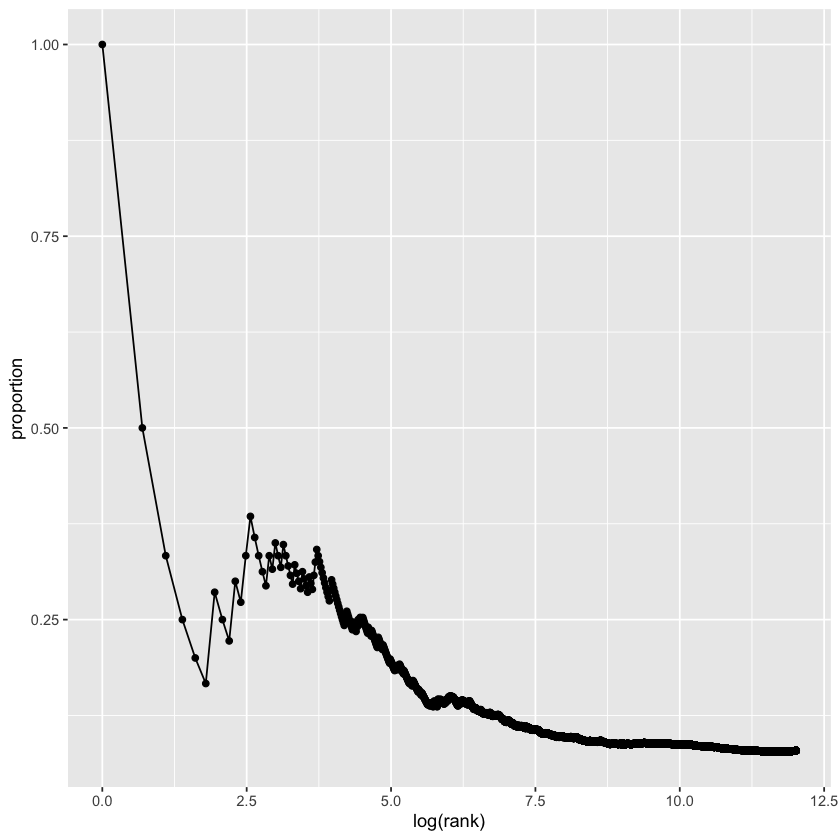

In [22]:
ggplot(res, aes(x = log(rank), y = proportion)) + geom_line() + geom_point()

In [23]:
missing_pred <- fread('files/missing_pred.csv')
#missing_pred <- missing_pred[missing_pred$featureID %in% aberrant_expressed,]
missing_pred$sampleID <- gsub("_NCI60","",missing_pred$sampleID)
missing_pred <- missing_pred[,c(1,2,6)]
colnames(missing_pred)[3] <- "pValue"
head(missing_pred)
nrow(missing_pred)

featureID,sampleID,pValue
<chr>,<chr>,<dbl>
P80723;P80723-2,MOLT4,5.788424e-08
O14910,K562,1.368819e-07
P80723;P80723-2,CCRFCEM,3.992209e-07
P29034,K562,3.078285e-06
P00918,RPMI8226,4.487351e-06
P29034,NCIH522,1.185360e-05


[1] 21474

In [24]:
missing_only <- merge(missing_pred, prot_samp_withRare, all.x=TRUE)
missing_only[is.na(missing_only$rare)]$rare <- 0
missing_only[is.na(missing_only$snpType)]$snpType <- "None"
missing_only <- missing_only[order(missing_only$pValue,-rare)]
head(missing_only)
nrow(missing_only)

featureID,sampleID,pValue,rare
<chr>,<chr>,<dbl>,<dbl>
P80723;P80723-2,MOLT4,5.788424e-08,0
O14910,K562,1.368819e-07,0
P80723;P80723-2,CCRFCEM,3.992209e-07,0
P29034,K562,3.078285e-06,0
P00918,RPMI8226,4.487351e-06,0
P29034,NCIH522,1.185360e-05,0


[1] 21476

In [25]:
missing_only$cumsum <- cumsum(missing_only$rare)
missing_only$rank = 1:nrow(missing_only)
missing_only$proportion <- missing_only$cumsum/missing_only$rank
head(missing_only)

featureID,sampleID,pValue,rare,cumsum,rank,proportion
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
P80723;P80723-2,MOLT4,5.788424e-08,0,0,1,0
O14910,K562,1.368819e-07,0,0,2,0
P80723;P80723-2,CCRFCEM,3.992209e-07,0,0,3,0
P29034,K562,3.078285e-06,0,0,4,0
P00918,RPMI8226,4.487351e-06,0,0,5,0
P29034,NCIH522,1.185360e-05,0,0,6,0


In [26]:
imputed_missing <- rbind(missing_pred, underexpressed)
imputed_missing <- imputed_missing[order(imputed_missing$pValue),]
nrow(imputed_missing)
head(imputed_missing)

[1] 186750

featureID,sampleID,pValue
<chr>,<chr>,<dbl>
P98175-2;P98175,SN12C,3.582025e-10
Q96JM3,DU145,4.589631e-10
P78347-2;P78347-4;P78347-3;P78347;P78347-5;Q86UP8-4;Q86UP8-2;Q6EKJ0-2;Q86UP8-5,HCT15,1.240254e-09
Q16778;P06899,HL60,2.462365e-09
Q9Y263,SKMEL5,2.647038e-09
Q9ULC4;Q9ULC4-3;Q9ULC4-2,LOXIMVI,1.082489e-08


In [27]:
nrow(training[training$log2fc>=0,])

[1] 231750

In [28]:
nrow(training[training$log2fc>=0,]) + nrow(imputed_missing)

[1] 418500

In [29]:
res_impute <- merge(imputed_missing, prot_samp_withRare, all.x=TRUE)
res_impute[is.na(res_impute$rare)]$rare <- 0
res_impute <- res_impute[order(pValue,-rare),]
head(res_impute)
nrow(res_impute)

featureID,sampleID,pValue,rare
<chr>,<chr>,<dbl>,<dbl>
P98175-2;P98175,SN12C,3.582025e-10,1
Q96JM3,DU145,4.589631e-10,0
P78347-2;P78347-4;P78347-3;P78347;P78347-5;Q86UP8-4;Q86UP8-2;Q6EKJ0-2;Q86UP8-5,HCT15,1.240254e-09,0
Q16778;P06899,HL60,2.462365e-09,0
Q9Y263,SKMEL5,2.647038e-09,0
Q9ULC4;Q9ULC4-3;Q9ULC4-2,LOXIMVI,1.082489e-08,0


[1] 186790

In [30]:
res_impute$cumsum <- cumsum(res_impute$rare)
res_impute$rank = 1:nrow(res_impute)
res_impute$proportion <- res_impute$cumsum/res_impute$rank
head(res_impute)

featureID,sampleID,pValue,rare,cumsum,rank,proportion
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
P98175-2;P98175,SN12C,3.582025e-10,1,1,1,1.0000000
Q96JM3,DU145,4.589631e-10,0,1,2,0.5000000
P78347-2;P78347-4;P78347-3;P78347;P78347-5;Q86UP8-4;Q86UP8-2;Q6EKJ0-2;Q86UP8-5,HCT15,1.240254e-09,0,1,3,0.3333333
Q16778;P06899,HL60,2.462365e-09,0,1,4,0.2500000
Q9Y263,SKMEL5,2.647038e-09,0,1,5,0.2000000
Q9ULC4;Q9ULC4-3;Q9ULC4-2,LOXIMVI,1.082489e-08,0,1,6,0.1666667


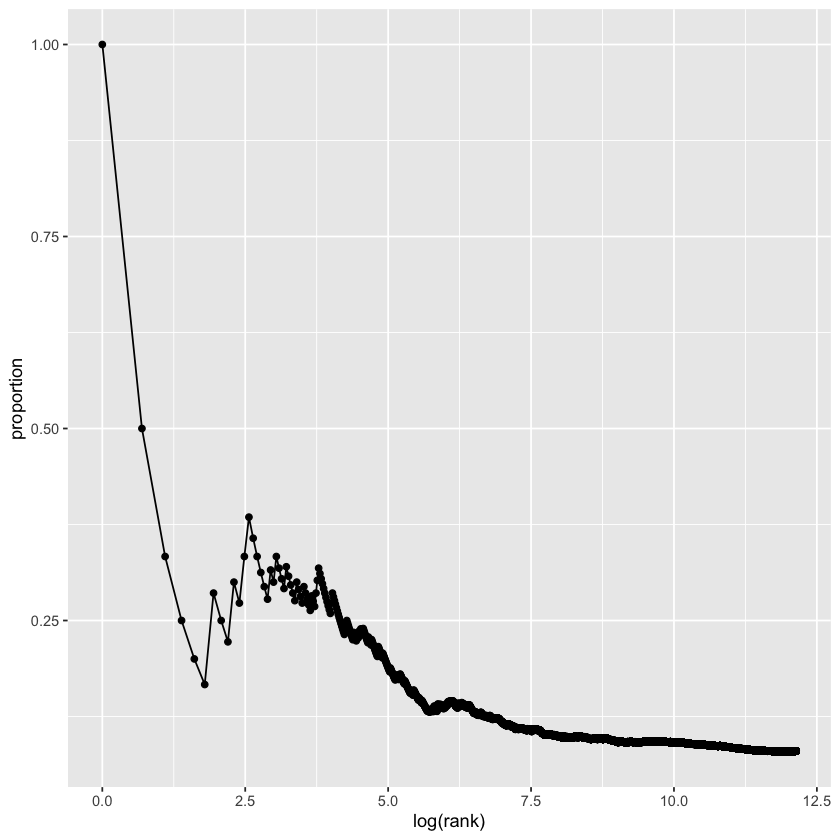

In [31]:
ggplot(res_impute, aes(log(rank), y = proportion)) + geom_line() + geom_point()

In [32]:
colnames(res)[7] <- "Baseline"
colnames(res_impute)[7] <- "withImputedMissingValue"
colnames(missing_only)[7] <-"missing"

ggplot() + geom_line(data=res, aes(x = rank, y = Baseline, colour = "Baseline"), size = 1.2) +
    geom_line(data=res_impute, aes(x = rank, y = withImputedMissingValue, colour = "Missing-value-aware Method"), size = 1.2) +
    geom_line(data=missing_only, aes(x = rank, y = missing, colour = "Missing value"), size = 1.2) + scale_x_log10() +
    xlab("Outlier rank") + ylab("Proportion of protein outliers associated with rare protein-affecting variants") +
    theme_bw() + theme(text=element_text(size=13),
                       legend.title = element_text(size=12), legend.text = element_text(size=12)) +
ggtitle("Recall of rare protein-affecting variants for \nproteins that are missing in only one sample")

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


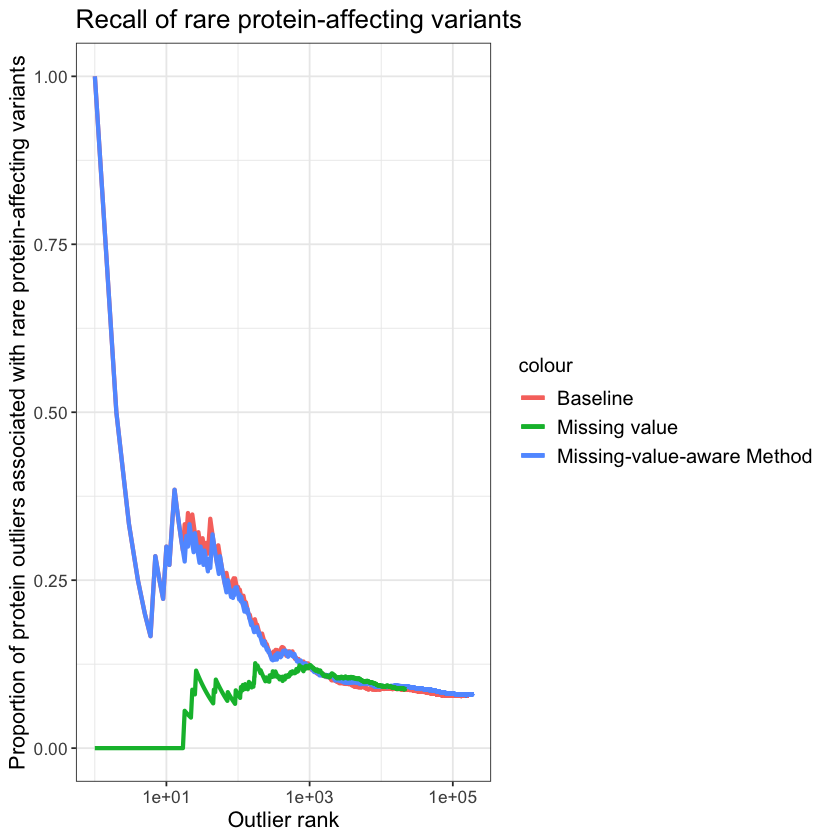

In [33]:
ggplot() + geom_line(data=res, aes(x = rank, y = Baseline, colour = "Baseline"), size = 1.2) +
    geom_line(data=res_impute, aes(x = rank, y = withImputedMissingValue, colour = "Missing-value-aware Method"), size = 1.2) +
    geom_line(data=missing_only, aes(x = rank, y = missing, colour = "Missing value"), size = 1.2) + scale_x_log10() +
    xlab("Outlier rank") + ylab("Proportion of protein outliers associated with rare protein-affecting variants") +
    theme_bw() + theme(text=element_text(size=13),
                       legend.title = element_text(size=12), legend.text = element_text(size=12)) +
ggtitle("Recall of rare protein-affecting variants")

[1] 0.4483313

[1] 0.447756

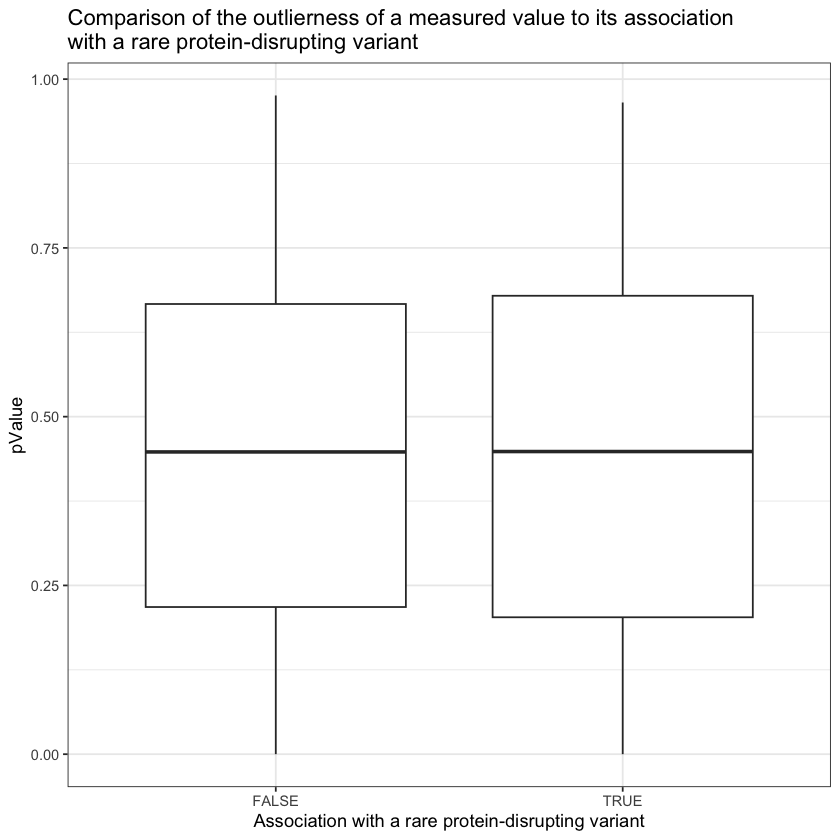

In [34]:
res$rareor <- as.factor(res$rare)
res[res$rareor==0]$rareor = "FALSE"
res[res$rareor==1]$rareor = "TRUE"
median(res[res$rareor==TRUE]$pValue)
median(res[res$rareor==FALSE]$pValue)
ggplot(res, aes(x= rareor, y = pValue)) + geom_boxplot() + 
theme_bw() + xlab("Association with a rare protein-disrupting variant") +
ggtitle("Comparison of the outlierness of a measured value to its association \nwith a rare protein-disrupting variant")

[1] 0.01570882

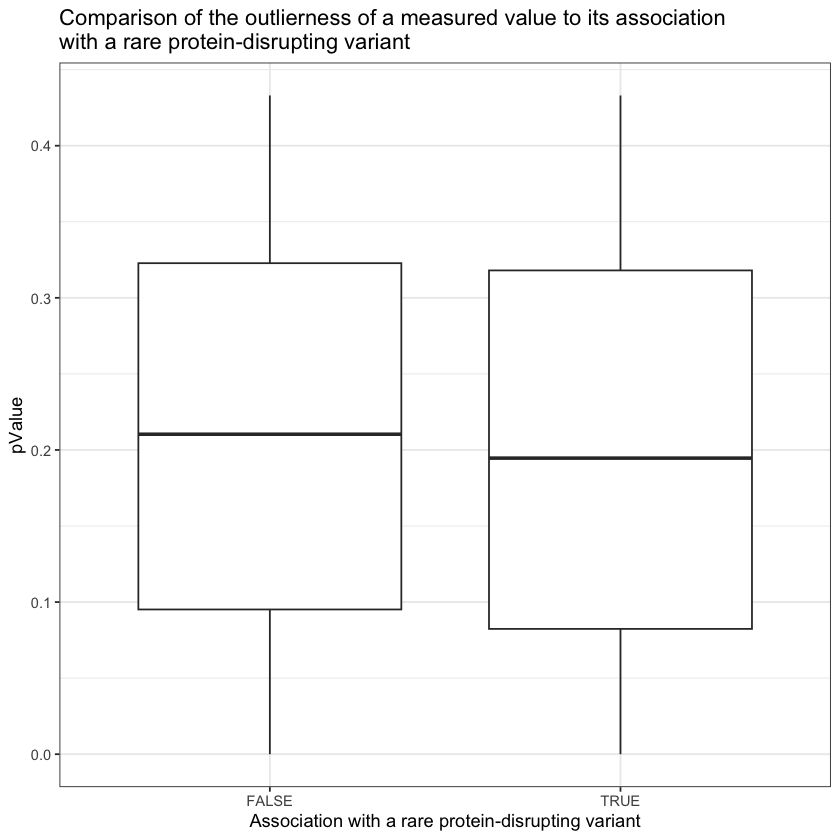

In [35]:
res_part <- res[1:80000,]
median(res_part[res_part$rareor==FALSE]$pValue) - median(res_part[res_part$rareor==TRUE]$pValue)
ggplot(res_part, aes(x= rareor, y = pValue)) + geom_boxplot() + 
theme_bw() + xlab("Association with a rare protein-disrupting variant") +
ggtitle("Comparison of the outlierness of a measured value to its association \nwith a rare protein-disrupting variant")

In [36]:
median(res[res$rareor==FALSE]$pValue) 
median(res[res$rareor==TRUE]$pValue)

[1] 0.447756

[1] 0.4483313

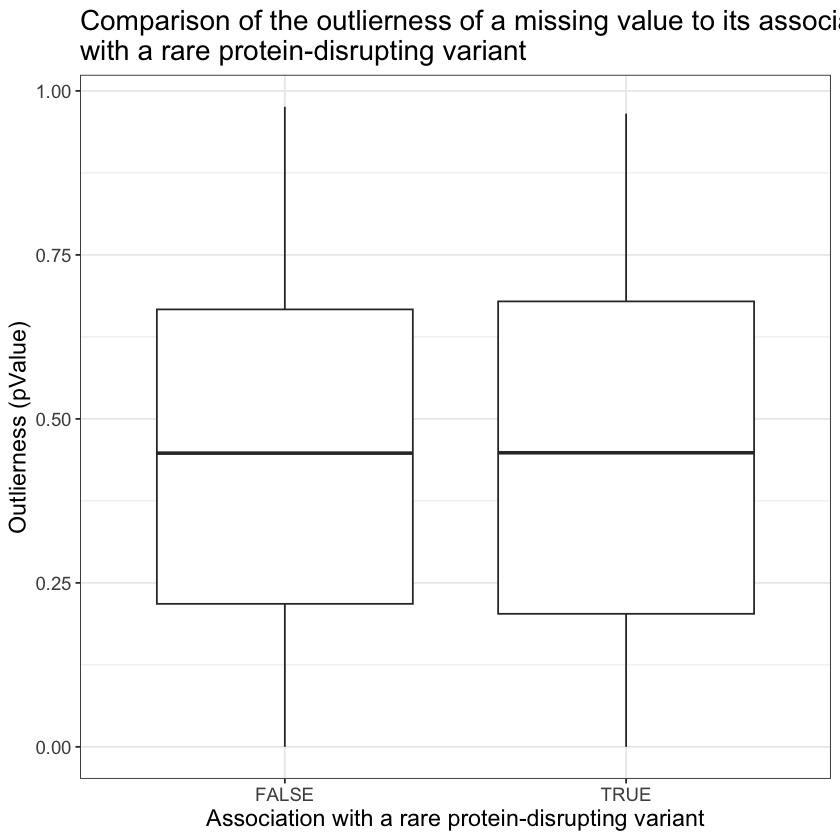

In [37]:
ggplot(res, aes(x= rareor, y = pValue)) + geom_boxplot() + 
theme_bw() + xlab("Association with a rare protein-disrupting variant") + ylab("Outlierness (pValue)") +
theme(text=element_text(size=14), legend.title = element_text(size=13), legend.text = element_text(size=12))+
ggtitle("Comparison of the outlierness of a missing value to its association \nwith a rare protein-disrupting variant")

ggplot(missing_only, aes(x= rareor, y = pValue)) + geom_boxplot() + 
theme_bw() + xlab("Association with a rare protein-disrupting variant") + ylab("Outlierness (pValue)") +
theme(text=element_text(size=14), legend.title = element_text(size=13), legend.text = element_text(size=12))+
ggtitle("Comparison of the outlierness of a missing value to its association \nwith a rare protein-disrupting variant")